# 소비분석 시각화

In [191]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rc


In [192]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
expense_df = pd.read_csv('data/CA.csv')

In [3]:
expense_df

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
0,1,3,6,2,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,3,5,2,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1,4,6,2,3,3,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,30000
3,2,4,6,2,4,3,40000.0,0.0,50000.0,NaN,NaN,20000.0,NaN,110000
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53592,2,4,3,1,1,3,NaN,NaN,100000.0,60000.0,40000.0,5000.0,50000.0,255000
53593,1,4,3,1,1,3,NaN,50000.0,600000.0,80000.0,50000.0,2000.0,50000.0,832000
53594,2,4,4,1,1,4,NaN,150000.0,80000.0,60000.0,50000.0,0.0,130000.0,470000
53595,1,4,3,1,3,4,NaN,NaN,10000.0,150000.0,NaN,NaN,90000.0,250000


### 5,60대 문화행사에 참여하는 사람 선택

In [62]:
# 문학행사에 참여한 사람
# 참여 행사가 모두 NaN인 값은 제거
expense_df.dropna(subset=['exhibition_price', 'museum_price', 'art_price', 'traditional_price', 'theater_price', 'movie_price', 'performance_price'],
          how='all',
          axis=0,
          inplace=True,
         )

# 50~60대만 선택
# 총 11997명
senior_df = expense_df[(expense_df['age']==5) | (expense_df['age']==6)]

In [63]:
senior_df

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
8,1,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
9,2,3,6,2,1,5,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000
10,1,3,5,3,1,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
19,2,3,5,2,1,5,0.0,NaN,NaN,NaN,NaN,10000.0,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53465,1,4,5,1,1,5,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,30000
53519,1,4,3,3,1,5,40000.0,NaN,NaN,30000.0,NaN,NaN,50000.0,120000
53550,1,3,1,1,3,5,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,15000
53557,2,4,5,1,1,5,NaN,NaN,0.0,60000.0,NaN,NaN,NaN,60000


In [64]:
# row index 초기화
senior_df = senior_df.reset_index()
senior_df

,index,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
0,4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
1,8,1,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
2,9,2,3,6,2,1,5,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000
3,10,1,3,5,3,1,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
4,19,2,3,5,2,1,5,0.0,NaN,NaN,NaN,NaN,10000.0,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11992,53465,1,4,5,1,1,5,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,30000
11993,53519,1,4,3,3,1,5,40000.0,NaN,NaN,30000.0,NaN,NaN,50000.0,120000
11994,53550,1,3,1,1,3,5,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,15000
11995,53557,2,4,5,1,1,5,NaN,NaN,0.0,60000.0,NaN,NaN,NaN,60000


## 0 소비 분석

In [70]:
# index와 total_price만 subset
price_df = senior_df[['index','total_price']]

# 오름차순으로 정렬
senior_df = senior_df.sort_values(by='total_price')


# 인덱스 다시 설정
senior_df = senior_df.reset_index(drop=True)

# index column 추가
indexes = senior_df.index.values
senior_df['index'] = indexes

# 마지막 4개 row 값은 오타 또는 이상치로 보임
# 따라서 제거
senior_df.drop(senior_df.tail(4).index,inplace=True)
senior_df.tail(10)


,index,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
11983,11983,1,4,6,2,2,5,NaN,NaN,1000000.0,NaN,1000000.0,NaN,NaN,2000000
11984,11984,1,4,7,2,1,5,NaN,NaN,2000000.0,50000.0,20000.0,20000.0,NaN,2090000
11985,11985,1,4,7,2,1,6,30000.0,700000.0,40000.0,80000.0,50000.0,200000.0,1000000.0,2100000
11986,11986,1,4,6,2,1,5,500000.0,NaN,NaN,NaN,NaN,200000.0,1500000.0,2200000
11987,11987,1,3,5,2,3,5,NaN,NaN,2000000.0,150000.0,100000.0,50000.0,NaN,2300000
11988,11988,1,4,6,2,2,5,NaN,NaN,1000000.0,NaN,1000000.0,300000.0,NaN,2300000
11989,11989,1,4,4,2,1,6,NaN,800000.0,500000.0,100000.0,300000.0,100000.0,500000.0,2300000
11990,11990,1,4,7,2,1,5,50000.0,200000.0,250000.0,300000.0,200000.0,1500000.0,200000.0,2700000
11991,11991,1,4,7,2,1,5,50000.0,200000.0,250000.0,300000.0,200000.0,1500000.0,200000.0,2700000
11992,11992,2,4,3,2,1,6,NaN,800000.0,1600000.0,180000.0,50000.0,60000.0,1500000.0,4190000


<Axes: xlabel='index'>

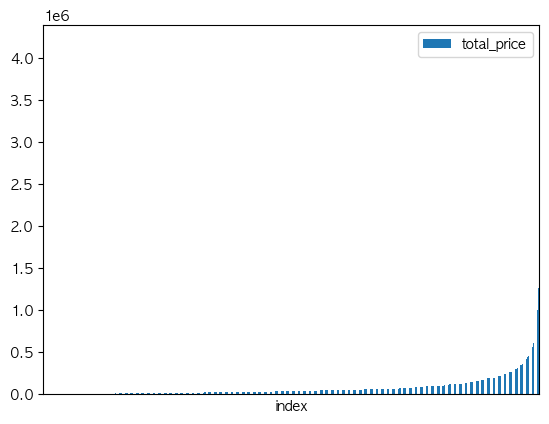

In [72]:
# 오른쪽 끝쪽에 이상치가 제거되어 있음을 확인 가능
senior_df.plot.bar(x= 'index' , y='total_price', xticks=[])

In [73]:
# 최고 금액이 7천만원 => 419만원인 것을 확인
max(senior_df['total_price'])

4190000

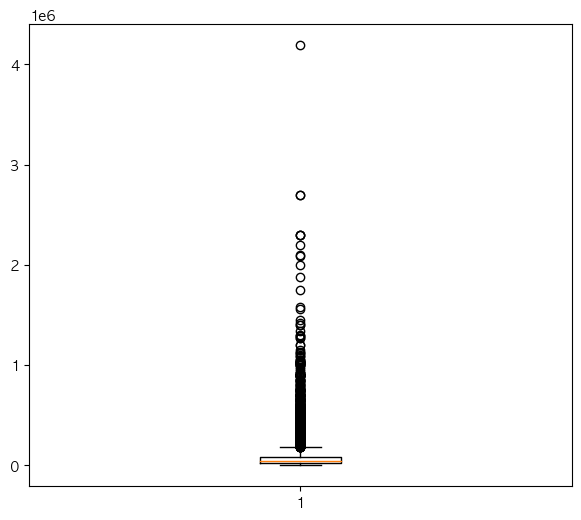

In [74]:
# 박스플롯으로 분포 확인
plt.figure(figsize=(7,6))
bp = plt.boxplot(senior_df['total_price'])

In [75]:
# 박스플롯은 딕셔너리 형태이기 때문에 아래와 같이 키를 가져올 수 있습니다:
# bp.keys()
q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Q1: {q1}\n'
      f'Q3: {q3}')
print('median: ',senior_df['total_price'].median())
print('mean: ',round(senior_df['total_price'].mean()))


# 해석:
# 이상치 제거 전
# 이상치(문화활동에 전혀 참여하지 않는 사람)이 많아 Q1이 0으로 나오는 것을 확인할 수 있다.
# 또한 이상치(오타로 인한 너무 큰 값)가 있어 기존에는 왜도가 심해 median과 mean의 차이가 크게 나오는 것 또한 확인할 수 있었

# 이상치 제거 후
# Q1이 20000으로 정상적인 값으로 나오는 것을 확인할 수 있다
# 여전히 mean이 Q3에 가깝지만 Q3를 넘어서지는 않는 것을 확인할 수 있다

Q1: [20000.0]
Q3: [85000.0]
median:  40000.0
mean:  81931


### 결과

Q1: [20000.0] </br>
Q3: [85000.0] </br>
median:  40000.0 </br>
mean:  81931 </br>
 
#### 해석
전체 소비자를 다음과 같이 세 그룹으로 나눌 수 있다:
* 적게 관람한 그룹
* 평균적으로 관람한 그룹
* 많이 관람한 그룹


분류 기준은 다음과 같다: </br>
적게 관람한 그룹은 Q1까지(20000원) </br>
평균적으로 관람한 그룹은 Q1(20000원) ~ mean(81931원) </br>
많이 관람한 그룹은 mean(81931원~) ~ </br>


### 그룹으로 나누기

In [77]:
# 그룹으로 나누기

# 적게 소비한 그룹
little_expense = senior_df[senior_df['total_price'] <= 20000]
# 평균적으로 소비한 그룹
medium_expense = senior_df[(20000 < senior_df['total_price']) & (senior_df['total_price'] <= 81931)]
# 많이 소비한 그룹
large_expense = senior_df[81931 < senior_df['total_price']]


# 3804명
print('적게 소비한 그룹: ',little_expense.count())
# 5162명
print('평균적으로 소비한 그룹: ',medium_expense.count())
# 3027명
print('많이 소비한 그룹: ',large_expense.count())


적게 관람한 그룹:  index                3804
sex                  3804
education            3804
income               3804
married              3804
work                 3804
age                  3804
exhibition_price      218
museum_price          214
art_price             123
traditional_price    1784
theater_price         262
movie_price          1854
performance_price     114
total_price          3804
dtype: int64
평균적으로 관람한 그룹:  index                5162
sex                  5162
education            5162
income               5162
married              5162
work                 5162
age                  5162
exhibition_price      342
museum_price          508
art_price             400
traditional_price    2429
theater_price         688
movie_price          3055
performance_price     208
total_price          5162
dtype: int64
많이 관람한 그룹:  index                3027
sex                  3027
education            3027
income               3027
married              3027
work                 3027

#### 그룹별 분포도

많이 관람한 그룹을 제외하고 박스플롯에 이상치가 없음을 확인할 수 있다

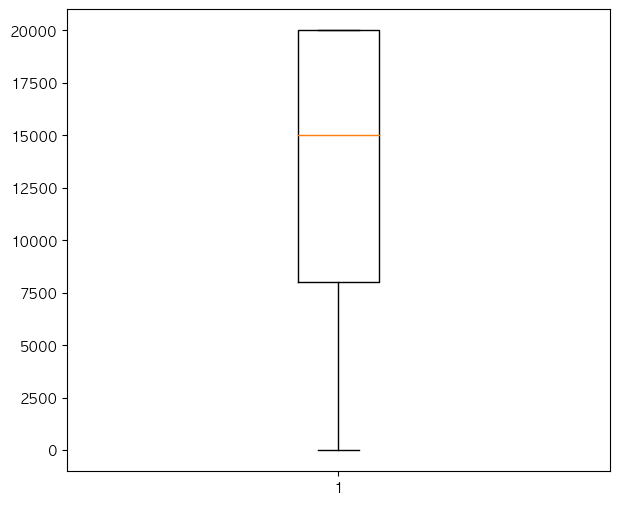

In [78]:
# 적게 관람한 그룹
plt.figure(figsize=(7,6))
bp = plt.boxplot(little_expense['total_price'])

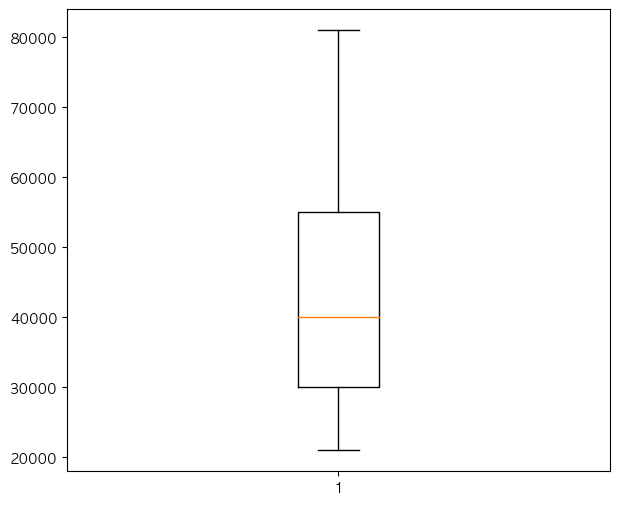

In [79]:
# 평균적으로 관람한 그룹
plt.figure(figsize=(7,6))
bp = plt.boxplot(medium_expense['total_price'])

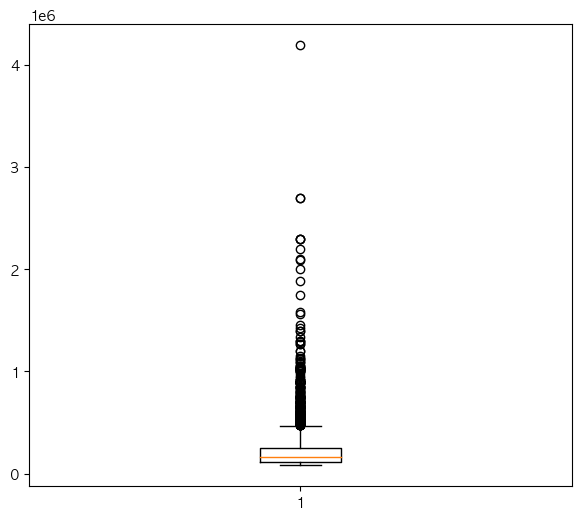

In [80]:
# 많이 관람한 그룹
plt.figure(figsize=(7,6))
bp = plt.boxplot(large_expense['total_price'])

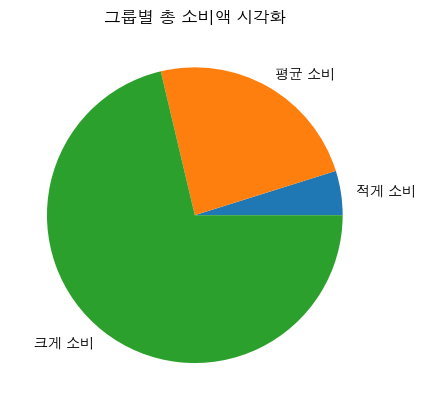

In [81]:
# 그룹별 총 소비액 시각화
total_expense = [little_expense['total_price'].sum(),medium_expense['total_price'].sum(),large_expense['total_price'].sum()]
labels = ['적게 소비', '평균 소비', '크게 소비']
plt.pie(total_expense, labels = mylabels)
plt.title('그룹별 총 소비액 시각화')
plt.show() 

Text(0.5, 1.0, '그룹별 인원수')

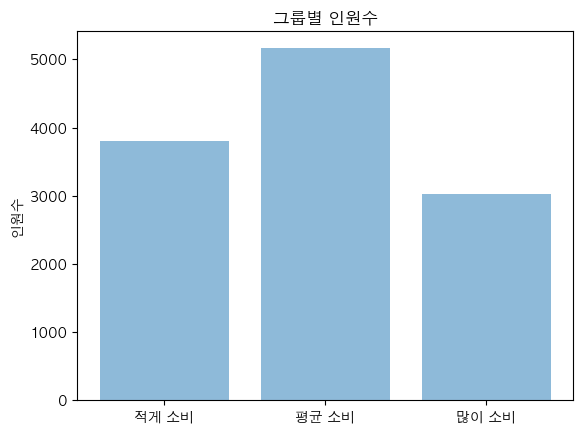

In [82]:
# 그룹별 인원수
num_ppl = [3804,5162,3027]

objects = ('적게 소비', '평균 소비', '많이 소비')
y_pos = np.arange(len(objects))

plt.bar(y_pos, num_ppl, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('인원수')
plt.title('그룹별 인원수')

sns.barplot(data=df, x="island", y="body_mass_g")


In [175]:
import seaborn as sns

In [181]:
num_ppl_array

array([3804, 5162, 3027])

<Axes: >

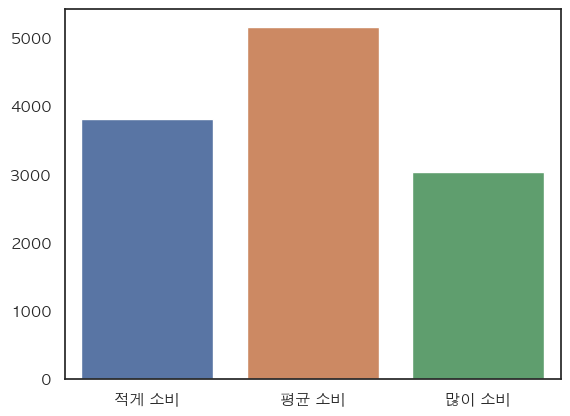

In [229]:
# 한글 깨짐 해결
sns.set_style("white")
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style="white")

sns.barplot(x=objects,y=num_ppl)

Text(0.5, 1.0, '그룹별 평균 소비액')

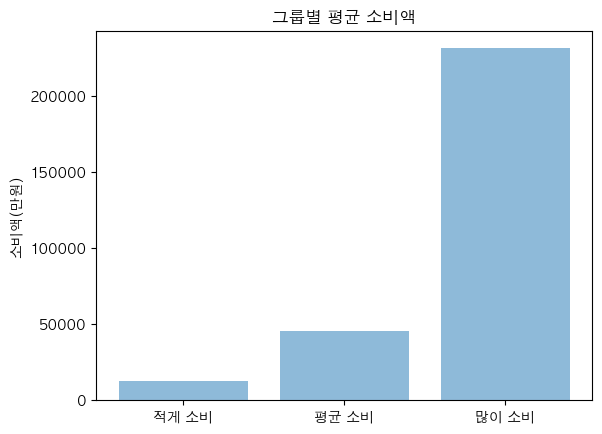

In [83]:
# 그룹별 평균 소비액 시각화

average_expense = [total_expense[0]/num_ppl[0], total_expense[1]/num_ppl[1], total_expense[2]/num_ppl[2]]

objects = ('적게 소비', '평균 소비', '많이 소비')
y_pos = np.arange(len(objects))

plt.bar(y_pos, average_expense, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('소비액(만원)')
plt.title('그룹별 평균 소비액')

In [85]:
# 적은 그룹 
# 총합 약 4700만원
print('적게 소비한 그룹 소비액 총합 :',total_expense[0])
# 적게 관람하는 그룹 평균 소비액
# 약 1만2천원
print('적게 소비한 그룹 소비액 평균 :',round(little_expense['total_price'].sum()/num_ppl[0]))

# 중간 그룹 총합
# 약 2억3400만원
print('평범하게 소비한 그룹 소비액 총합 :',total_expense[1])
# 적게 관람하는 그룹 평균 소비액
# 약 4만5천원
print('평범하게 소비한 그룹 소비액 평균 :',round(medium_expense['total_price'].sum()/num_ppl[1]))

# 많이 소비한 그룹 총합
# 약 7억원
print('많이 소비한 그룹 소비액 총합 :',large_expense['total_price'].sum())
# 많이 관람하는 그룹 평균 소비액
# 약 23만원
print('많이 소비한 그룹 소비액 평균 :',round(large_expense['total_price'].sum()/num_ppl[2]))

적게 소비한 그룹 소비액 총합 : 47614899
적게 소비한 그룹 소비액 총합 : 12517
평범하게 소비한 그룹 소비액 총합 : 234374600
평범하게 소비한 그룹 소비액 총합 : 45404
많이 소비한 그룹 소비액 총합 : 700607000
많이 소비한 그룹 소비액 총합 : 231453


In [217]:
print('상위 그룹 전체 소비 금액의',100*round(700607000/(47614899 + 234374600 + 700607000),3),'%')

print('상위 그룹 전체 소비 금액의',100*round(47614899/(47614899 + 234374600 + 700607000),3),'%')

상위 그룹 전체 소비 금액의 71.3 %
상위 그룹 전체 소비 금액의 4.8 %


### 성별에 따른 소비그룹 확인

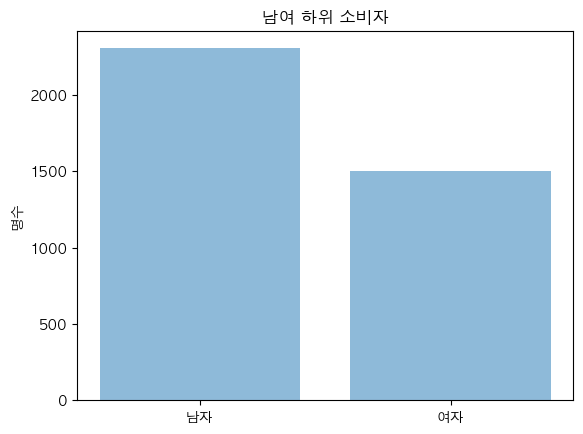

0.61


In [133]:
# 하위 소비자 그룹
# 남성     여성
# 2304명  1500명
little_sex = [len(little_expense[little_expense['sex']==1]), len(little_expense[little_expense['sex']==2])]
sex = ['남자', '여자']
y_pos = np.arange(len(sex))

plt.bar(sex, little_sex, align='center', alpha=0.5)
plt.xticks(y_pos,sex)
plt.ylabel('명수')
plt.title('남여 하위 소비자')

plt.show()

# 남자가 61%
print(round(little_sex[0]/(little_sex[0]+little_sex[1]),2))

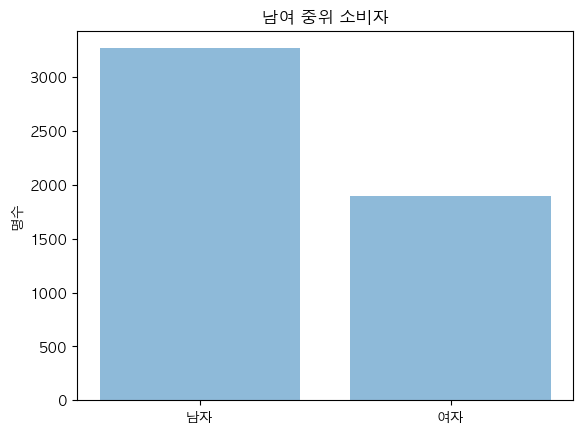

0.63


In [131]:
# 중위 소비자 그룹
# 남성     여성
# 3269명  1893명
medium_sex = [len(medium_expense[medium_expense['sex']==1]), len(medium_expense[medium_expense['sex']==2])]
sex = ['남자', '여자']
y_pos = np.arange(len(sex))

plt.bar(sex, medium_sex, align='center', alpha=0.5)
plt.xticks(y_pos,sex)
plt.ylabel('명수')
plt.title('남여 중위 소비자')

plt.show()
# 남자가 63%
print(round(medium_sex[0]/(medium_sex[0]+medium_sex[1]),2))

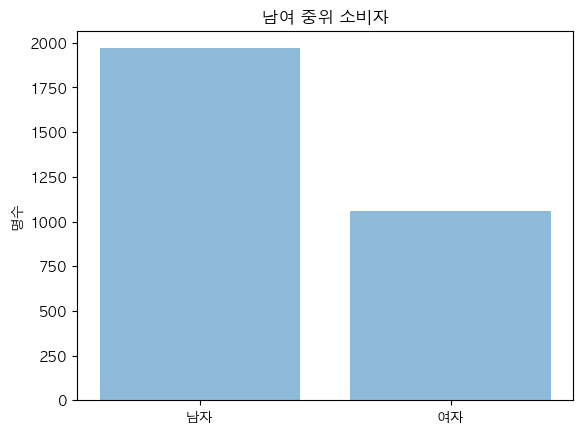

0.65


In [134]:
# 상위 소비자 그룹
# 남성     여성
# 2304명  1500명
large_sex = [len(large_expense[large_expense['sex']==1]), len(large_expense[large_expense['sex']==2])]
sex = ['남자', '여자']
y_pos = np.arange(len(sex))

plt.bar(sex, large_sex, align='center', alpha=0.5)
plt.xticks(y_pos,sex)
plt.ylabel('명수')
plt.title('남여 상위 소비자')

plt.show()

# 남자가 65%
print(round(large_sex[0]/(large_sex[0]+large_sex[1]),2))

## concat dataframe

### 종사그룹에 따른 소비그룹 확인

In [170]:
senior_df['work'].unique()
# 종사그룹 [work] 
# 1 : 임금. 봉급 근로자
# 2 : 고용원을 둔 사업자
# 3 : 고용원이 없는 자영자
# 4 : 무급가족종사자
# 5 : 해당없음(무직:학생포함)

# 5번 없음!

array([3, 1, 2, 4])

In [137]:
little_expense

,index,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
0,0,1,3,3,2,3,6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,1,4,4,3,3,5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
2,2,1,4,1,2,3,5,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0
3,3,2,4,4,3,3,6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,4,2,4,4,2,1,5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,3799,2,4,6,3,3,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
3800,3800,2,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
3801,3801,1,3,4,2,3,6,NaN,NaN,NaN,20000.0,NaN,NaN,NaN,20000
3802,3802,1,3,6,2,2,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000


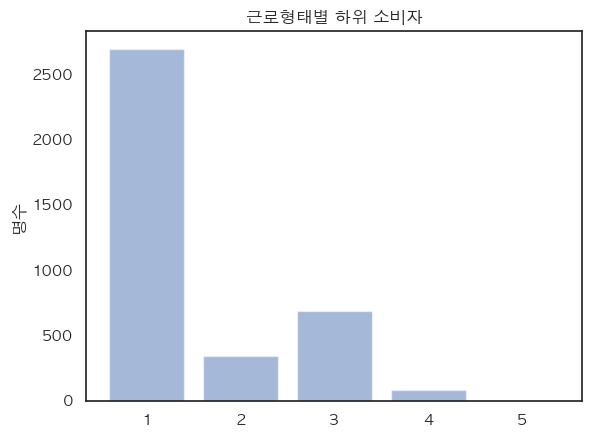

0.71


In [230]:
# 하위 소비자 그룹
little_work = [len(little_expense[little_expense['work']==i]) for i in range(1,6)]
little_work

work = ['1', '2', '3', '4', '5']
y_pos = np.arange(len(work))

plt.bar(work, little_work, align='center', alpha=0.5)
plt.xticks(y_pos,work)
plt.ylabel('명수')
plt.title('근로형태별 하위 소비자')

plt.show()

# 임금 근로자 비율
# 71%
print(round(little_work[0]/sum(little_work),2))

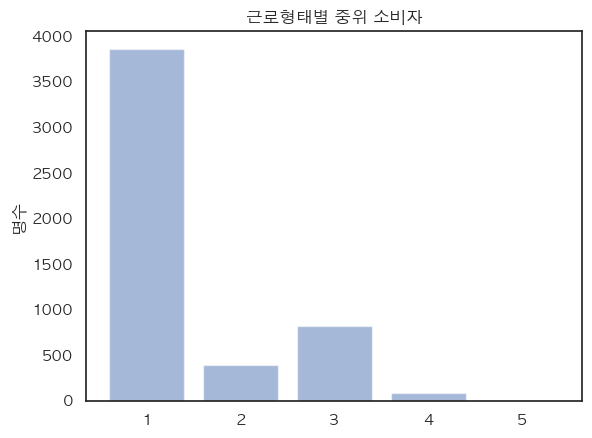

0.75


In [231]:
# 중위 소비자 그룹
medium_work = [len(medium_expense[medium_expense['work']==i]) for i in range(1,6)]
medium_work

work = ['1', '2', '3', '4', '5']
y_pos = np.arange(len(work))

plt.bar(work, medium_work, align='center', alpha=0.5)
plt.xticks(y_pos,work)
plt.ylabel('명수')
plt.title('근로형태별 중위 소비자')

plt.show()

# 임금 근로자 비율
# 75%
print(round(medium_work[0]/sum(medium_work),2))

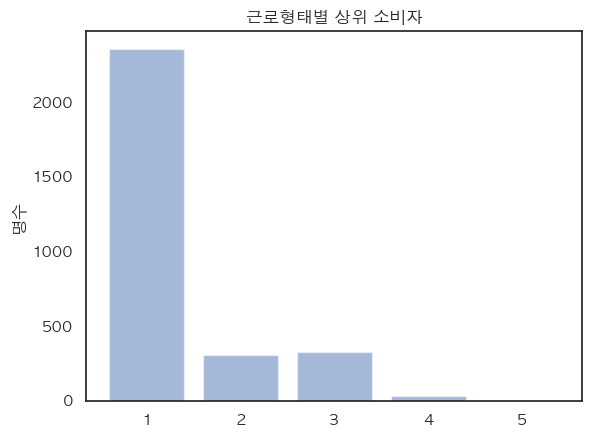

0.78


In [232]:
# 상위 소비자 그룹
large_work = [len(large_expense[large_expense['work']==i]) for i in range(1,6)]

work = ['1', '2', '3', '4', '5']
y_pos = np.arange(len(work))

plt.bar(work, large_work, align='center', alpha=0.5)
plt.xticks(y_pos,work)
plt.ylabel('명수')
plt.title('근로형태별 상위 소비자')

plt.show()

# 임금 근로자 비율
# 78%
print(round(large_work[0]/sum(large_work),2))

In [ ]:
sns.set_style("white")
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style="white")

sns.barplot(x=objects,y=num_ppl)


large_work = [len(large_expense[large_expense['work']==i]) for i in range(1,6)]

work = ['1', '2', '3', '4', '5']
y_pos = np.arange(len(work))

plt.bar(work, large_work, align='center', alpha=0.5)
plt.xticks(y_pos,work)
plt.ylabel('명수')
plt.title('근로형태별 상위 소비자')

In [151]:
print(little_work)
print(medium_work)
print(large_work)

[2692, 339, 690, 83, 0]
[3861, 393, 820, 88, 0]
[2357, 309, 330, 31, 0]


### 결론

모든 그룹에서 임금 종사자가 가장 큰 비율을 차지한다 => 이건 예상하던 바 </br>
각 그룹에서 임금 종사자의 비율이 증가한다는 것을 알 수 있다

71% => 75% => 78%

### 각 그룹에 연수입 확인

In [169]:
senior_df['income'].unique()

# 1 : 100만원 미만
# 2 : 100-200만원
# 3 : 200-300만원
# 4 : 300-400만원
# 5 : 400-500만원
# 6 : 500-600만원
# 7 : 600만원 이상


array([3, 4, 1, 7, 6, 5, 2])

In [ ]:
# 하위 소비자 그룹
little_work = [len(little_expense[little_expense['work']==i]) for i in range(1,6)]
little_work

work = ['1', '2', '3', '4', '5']
y_pos = np.arange(len(work))

plt.bar(work, little_work, align='center', alpha=0.5)
plt.xticks(y_pos,work)
plt.ylabel('명수')
plt.title('근로형태별 하위 소비자')

plt.show()

# 임금 근로자 비율
# 71%
print(round(little_work[0]/sum(little_work),2))

# 할 일:

## 소비를 많이 하는 사람들이 소비하는 카테고리 시각화 (데이터2)
## 참여를 많이 하는 사람들이 참여하는 카테고리 시각화 (데이터1)

In [ ]:
large_expense



total_expense = [little_expense[''].sum(),medium_expense['total_price'].sum(),large_expense['total_price'].sum()]
labels = ['적게 소비', '평균 소비', '크게 소비']
plt.pie(total_expense, labels = mylabels)
plt.title('그룹별 총 소비액 시각화')
plt.show() 

## 1 성별에 따른 평균 소비

### 남여 조사자 수 차이

In [105]:
# 남자
senior_df['sex'].value_counts()[1]
# 여자
senior_df['sex'].value_counts()[2]

sex_cnt = [senior_df['sex'].value_counts()[1],senior_df['sex'].value_counts()[2]]

<BarContainer object of 2 artists>

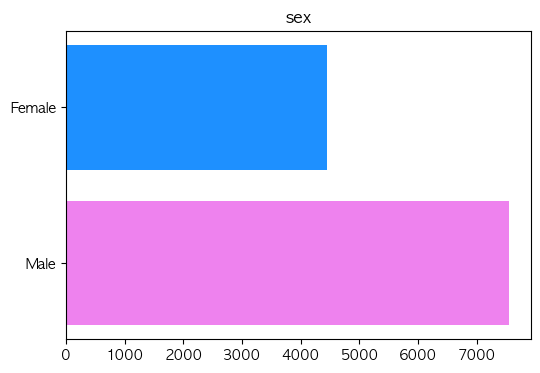

In [106]:
# 남여 조사자 수 차이
plt.figure(figsize=(6,4))

s = ['Male', 'Female']
y = np.arange(2)

plt.title('sex')
plt.yticks(y, s)
plt.barh(y, sex_cnt, color=['violet','dodgerblue'])


## 1 사회적으로 어떤 이슈가 있는가? (국가에서 지원할 복지)


### 1. 성별 및 소비액별을 시각화 (연령 항아리 표처럼)
### 2. 각 카테고리 소비액의 총합
### 3. 소비를 많이 하는 사람들이 소비하는 카테고리 시각화 (데이터2)
### 4. 참여를 많이 하는 사람들이 참여하는 카테고리 시각화 (데이터1)
### 5. 소득층 별 참여하는 카테고리 시각화
### 6. 소비를 많이 하는 사람들은 고소득층인가? (건물주?)
### 7. 저소득층의 문화소비를 높일만한 방법이 있을지?
### 8. 저소득층을 위한 문화소비를 높일만한 방법 제안 (OTT 지원 등)


## 2 사업 아이템 


## 3 마케팅 방식



In [171]:
senior_df

,index,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
0,0,1,3,3,2,3,6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,1,4,4,3,3,5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
2,2,1,4,1,2,3,5,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0
3,3,2,4,4,3,3,6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,4,2,4,4,2,1,5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11988,11988,1,4,6,2,2,5,NaN,NaN,1000000.0,NaN,1000000.0,300000.0,NaN,2300000
11989,11989,1,4,4,2,1,6,NaN,800000.0,500000.0,100000.0,300000.0,100000.0,500000.0,2300000
11990,11990,1,4,7,2,1,5,50000.0,200000.0,250000.0,300000.0,200000.0,1500000.0,200000.0,2700000
11991,11991,1,4,7,2,1,5,50000.0,200000.0,250000.0,300000.0,200000.0,1500000.0,200000.0,2700000


# 1. 3번과 4번 비교

## 지우님 예측 데이터 확인

### 예측값에 따라서 평균 지출 금액?

In [ ]:
#